In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
train=pd.read_csv(r"G:\Rhishi\train_1.csv")
train.head()

,Page,01/07/2015,02/07/2015,03/07/2015,04/07/2015,05/07/2015,06/07/2015,07/07/2015,08/07/2015,09/07/2015,...,22/12/2016,23/12/2016,24/12/2016,25/12/2016,26/12/2016,27/12/2016,28/12/2016,29/12/2016,30/12/2016,31/12/2016
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 31/12/2016
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
print('no of rows::',len(train),'no of columns::',len(train.columns))

no of rows:: 145063 no of columns:: 551


In [5]:
# NA
na_rows=train[train.isnull().sum(axis=1)>0]
len(na_rows)

27786

In [6]:
train_1=train.dropna()
train_1.reset_index(drop=True,inplace=True)

In [7]:
len(train_1)

117277

In [8]:
train_1.head(n=2)

,Page,01/07/2015,02/07/2015,03/07/2015,04/07/2015,05/07/2015,06/07/2015,07/07/2015,08/07/2015,09/07/2015,...,22/12/2016,23/12/2016,24/12/2016,25/12/2016,26/12/2016,27/12/2016,28/12/2016,29/12/2016,30/12/2016,31/12/2016
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0


In [9]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

train_1['lang'] = train_1.Page.map(get_language)

from collections import Counter

print(Counter(train_1.lang))

Counter({'ja': 18401, 'en': 18297, 'de': 16179, 'fr': 15790, 'ru': 13449, 'zh': 13190, 'es': 12799, 'na': 9172})


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
lang_sets = {}
lang_sets['en'] = train_1[train_1.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train_1[train_1.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train_1[train_1.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train_1[train_1.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train_1[train_1.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train_1[train_1.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train_1[train_1.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train_1[train_1.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]


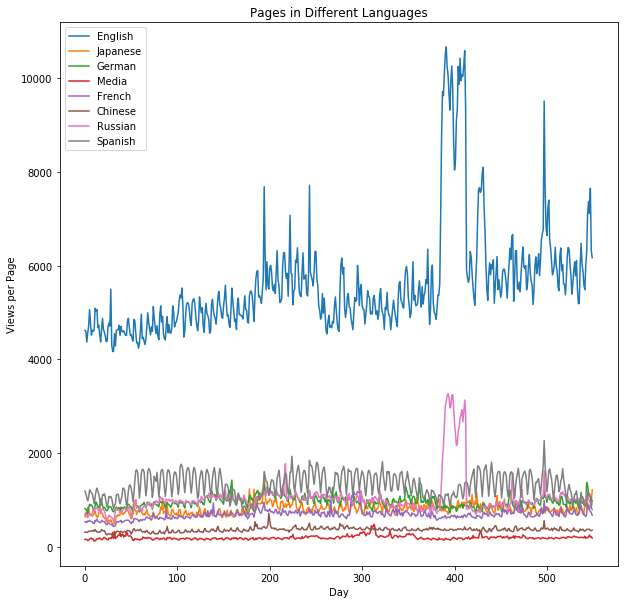

In [11]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

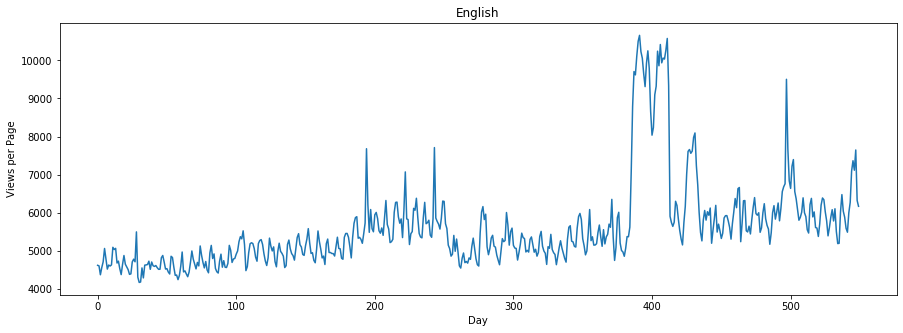

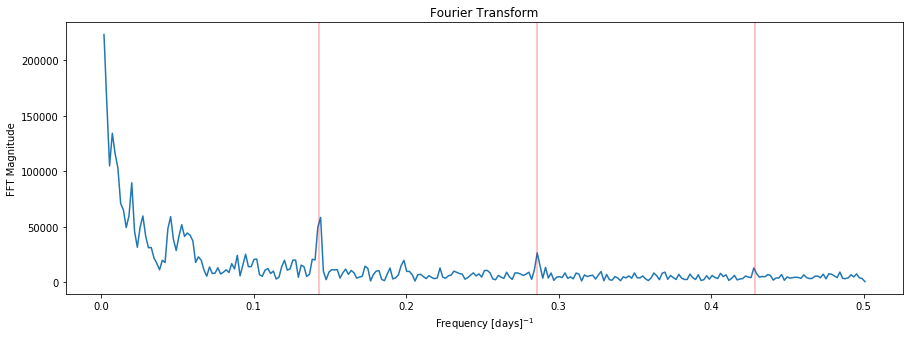

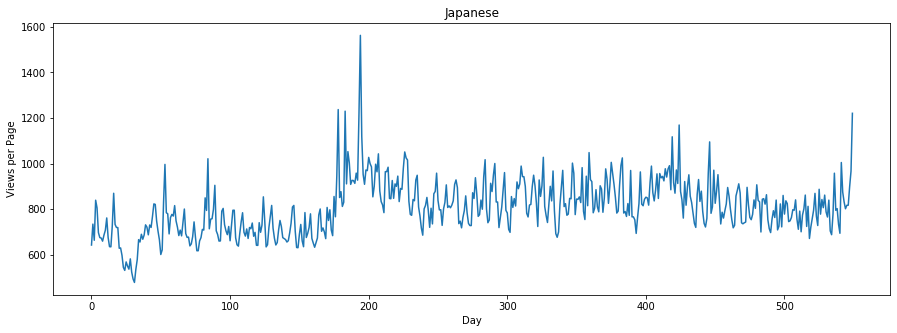

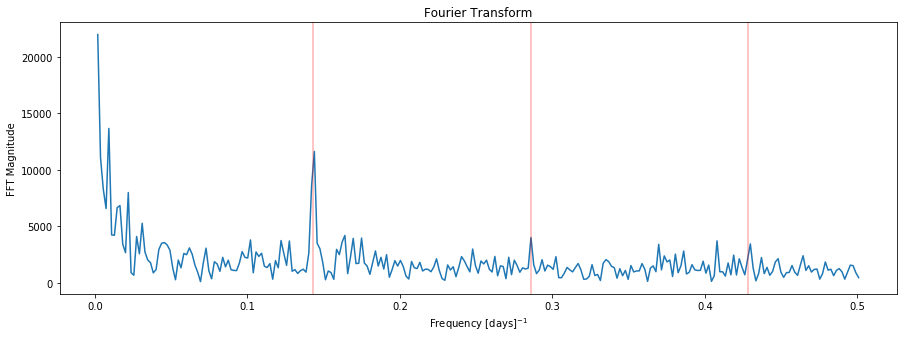

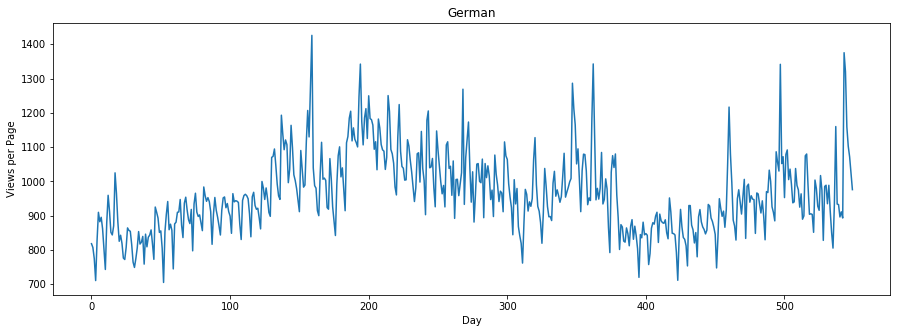

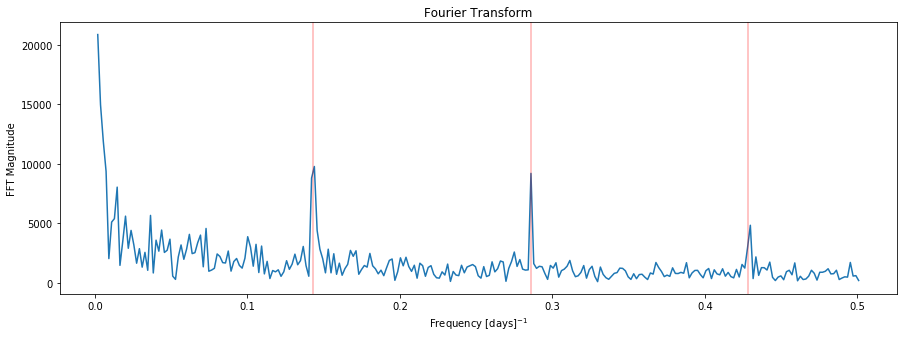

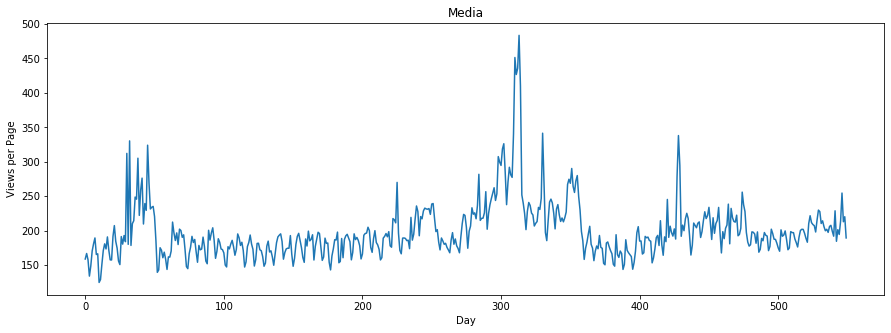

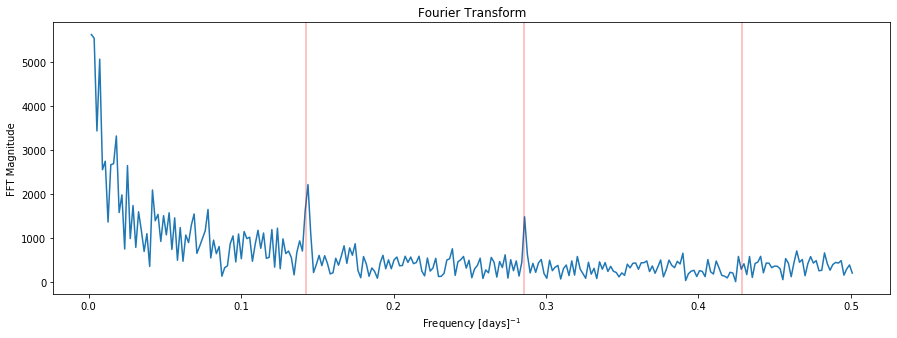

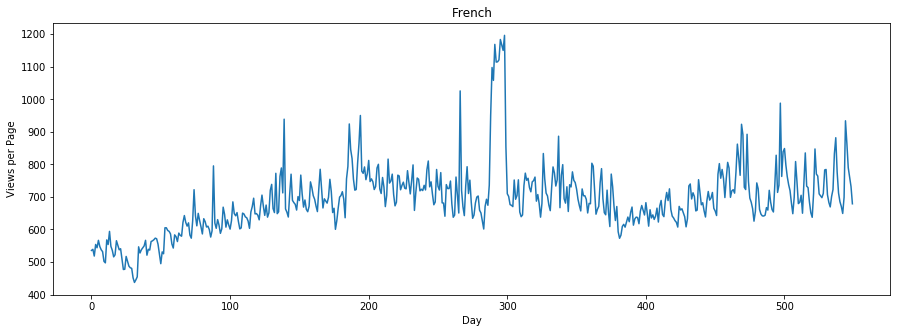

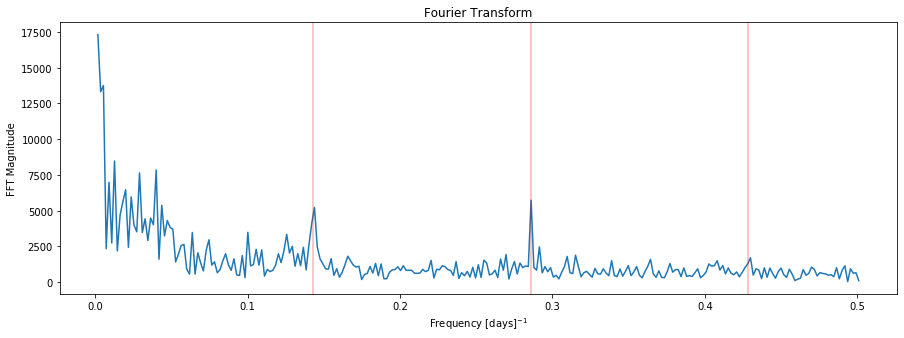

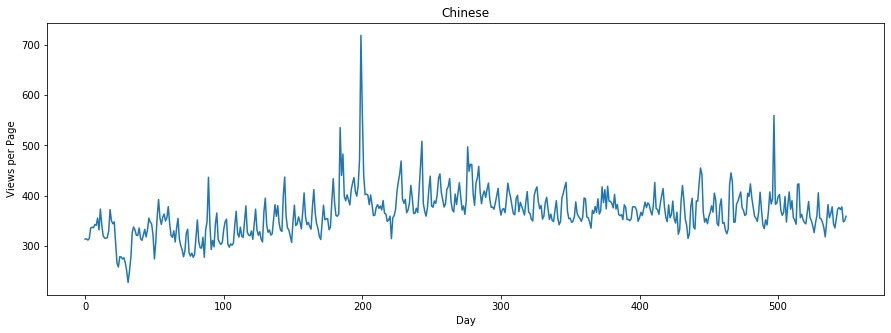

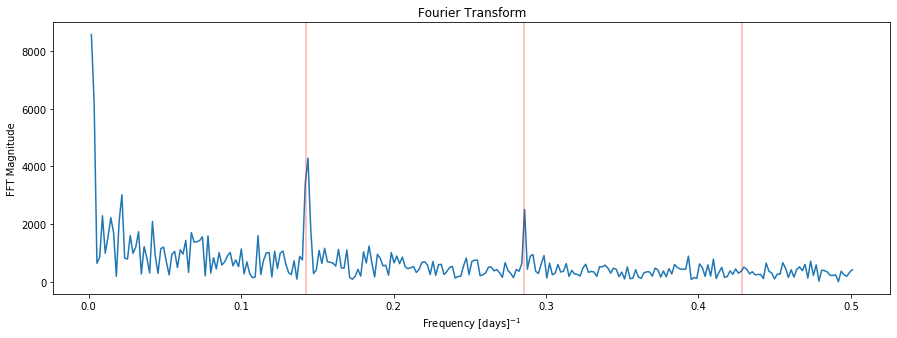

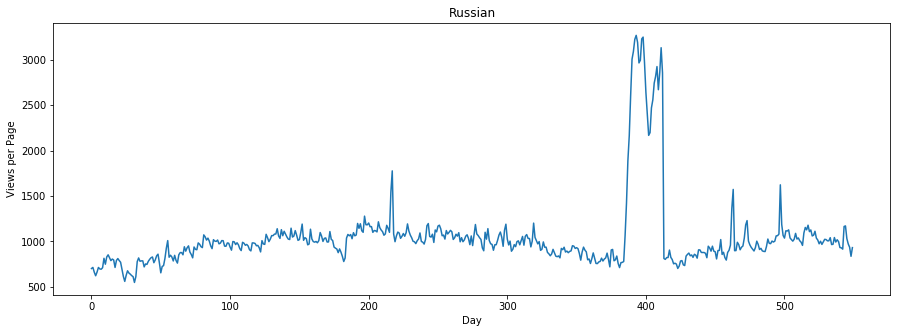

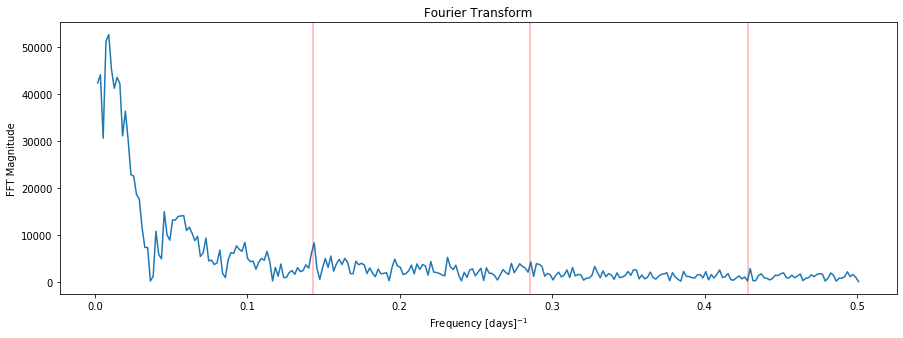

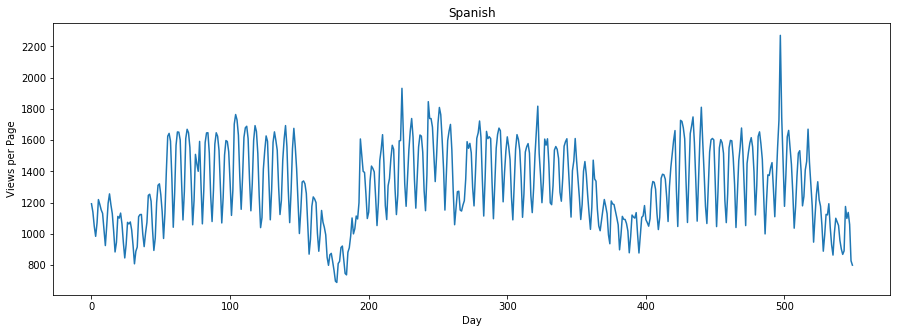

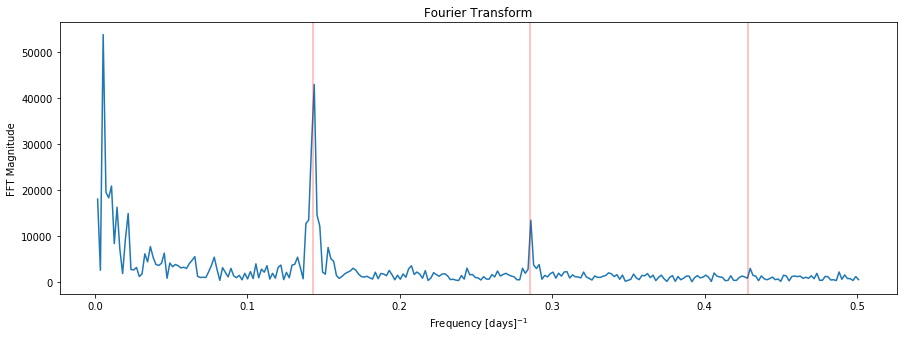

In [12]:
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key])
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

for key in sums:
    plot_with_fft(key)


In [13]:
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

en
                                                    Page         total
30279   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
8060       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
59616   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
30808  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
8610   Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09
60120  Special:Search_en.wikipedia.org_mobile-web_all...  2.921628e+08
30802  Special:Book_en.wikipedia.org_all-access_all-a...  1.339931e+08
8607    Special:Book_en.wikipedia.org_desktop_all-agents  1.332859e+08
26059       Main_Page_en.wikipedia.org_all-access_spider  1.290204e+08
26597  Special:Search_en.wikipedia.org_all-access_spider  1.243102e+08



ja
                                                  Page        total
95114    メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
67922       メインページ_ja.wikipedia.org_desktop_all-agents  134147415.0
97777 

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20210 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29642 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33883 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20210 missing from current font.
  font.set_text(s, 0, fl

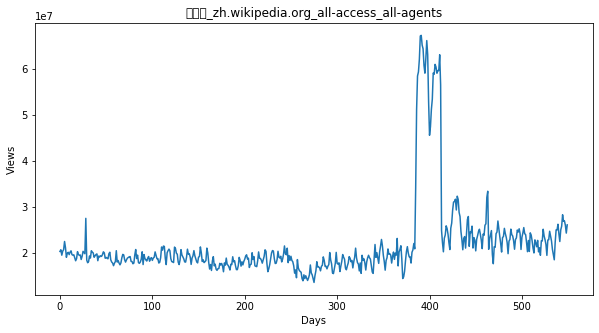

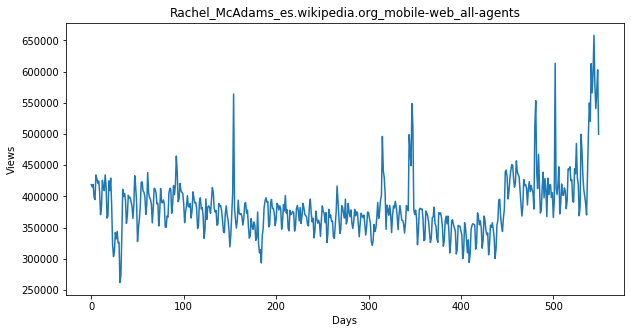

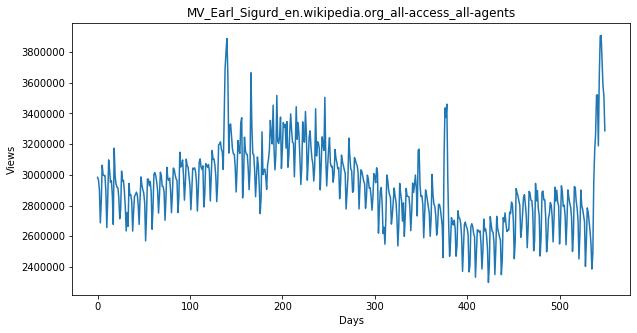

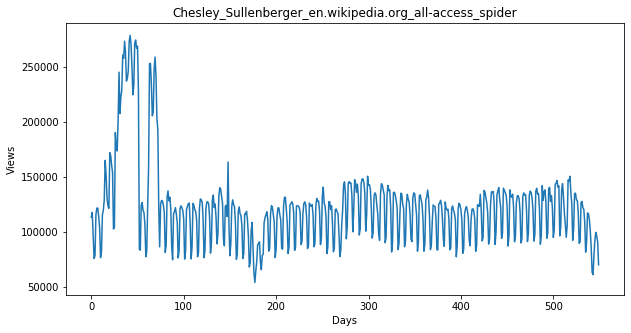

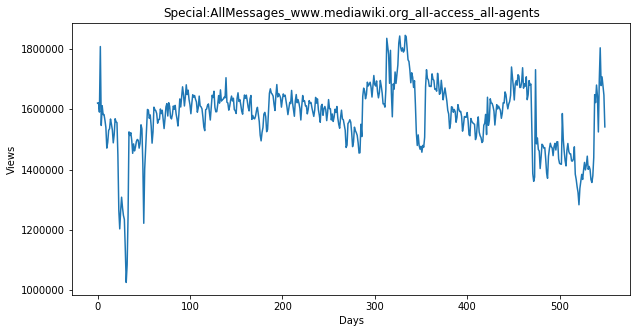

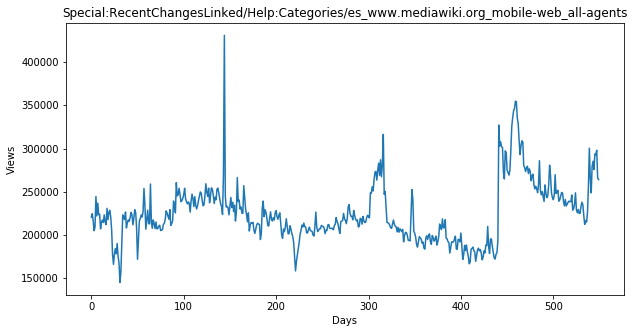

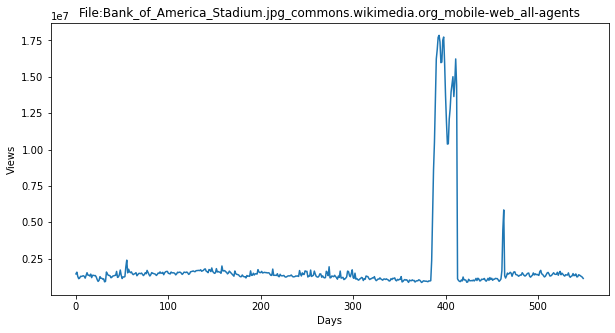

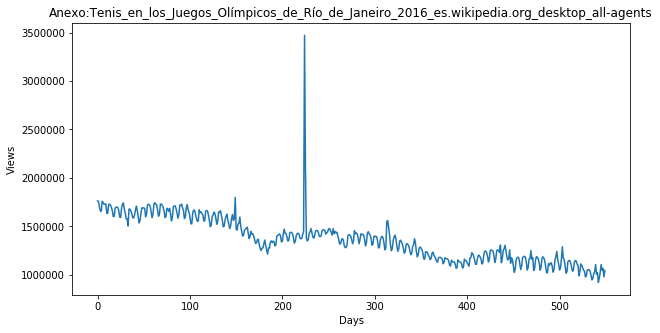

In [14]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train_1.columns
    cols = cols[1:-1]
    data = train_1.loc[top_pages[key],cols]
    plt.plot(days,data)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.show()


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20210 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29642 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: Run

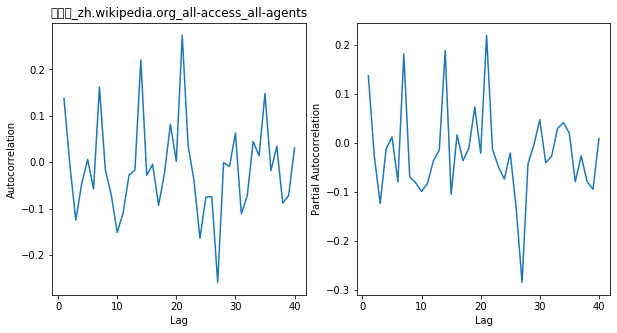

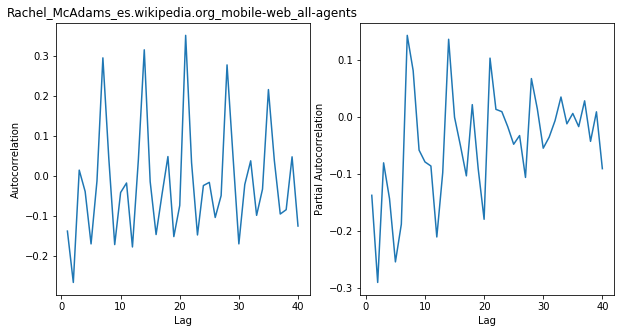

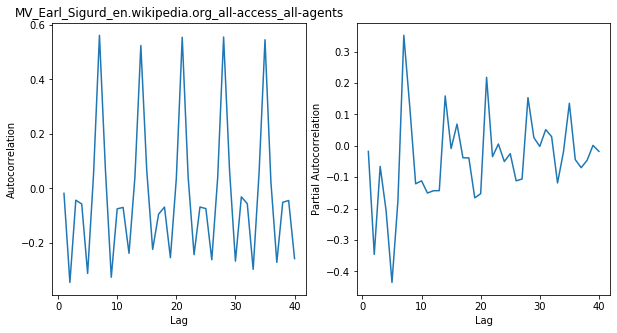

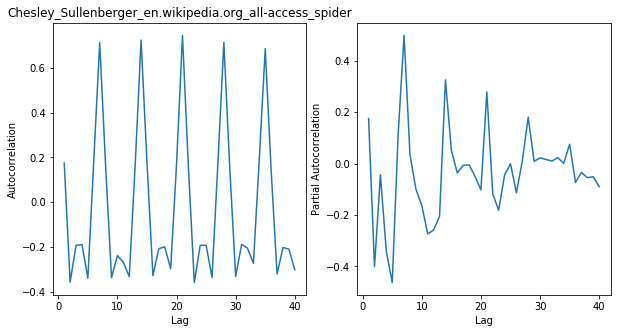

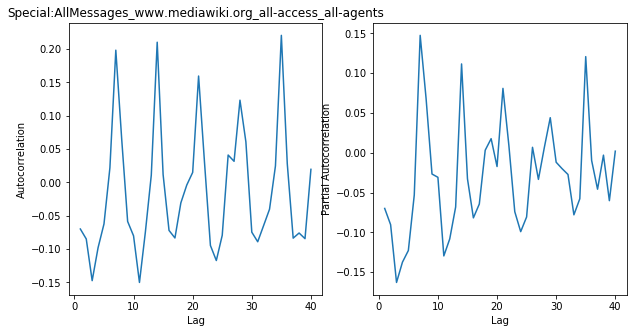

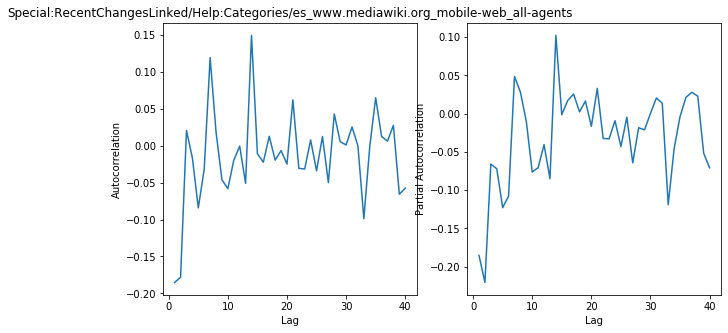

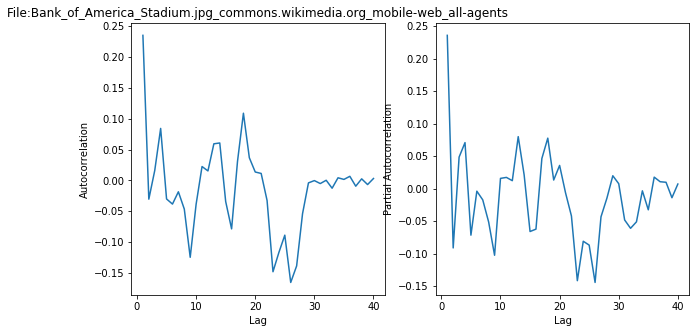

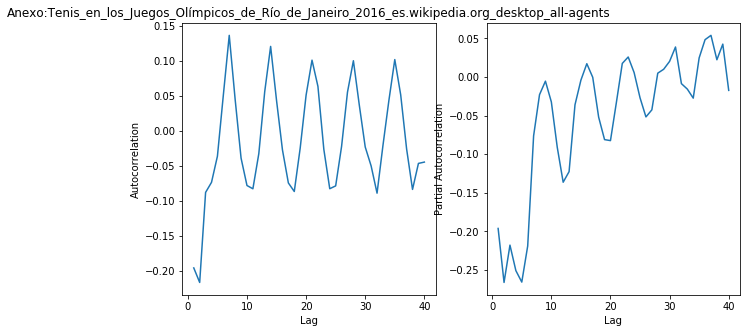

In [15]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in top_pages:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    cols = train_1.columns[1:-1]
    data = np.array(train_1.loc[top_pages[key],cols])
    data_diff = [data[i] - data[i-1] for i in range(1,len(data))]
    autocorr = acf(data_diff)
    pac = pacf(data_diff)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title(train.loc[top_pages[key],'Page'])

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    plt.show()

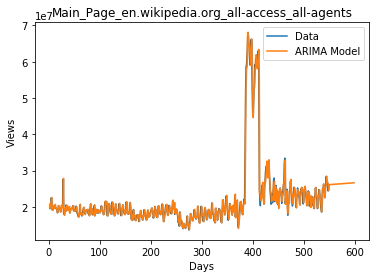

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0

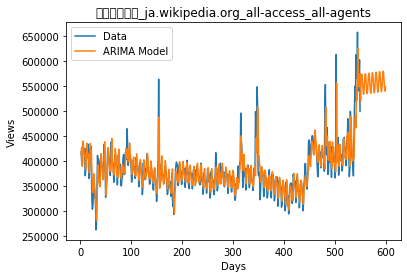

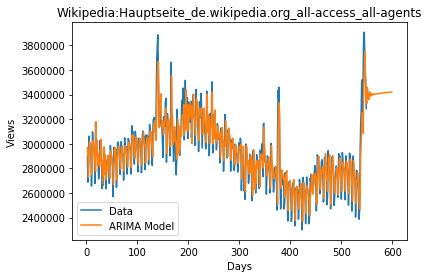

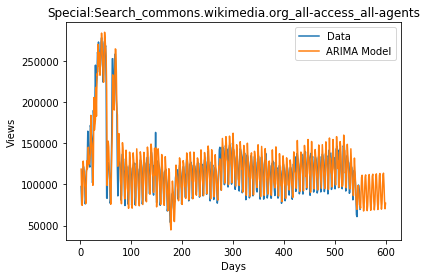

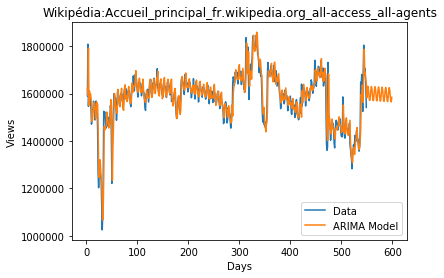

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0, flags=flags)


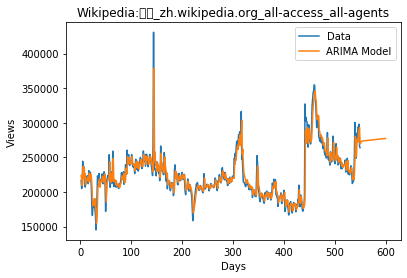

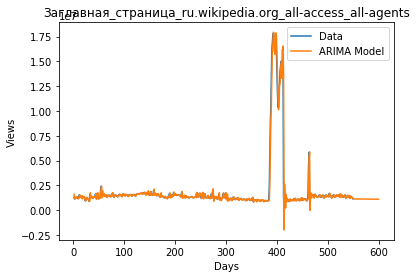

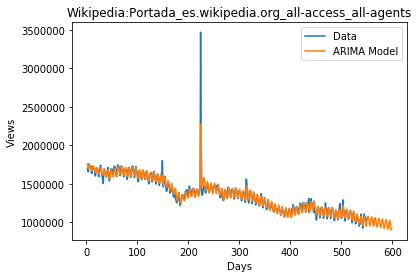

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

cols = train_1.columns[1:-1]
for key in top_pages:
    data = np.array(train_1.loc[top_pages[key],cols],'f')
    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data,[2,1,4])
            result = arima.fit(disp=False)
        except:
            try:
                arima = ARIMA(data,[2,1,2])
                result = arima.fit(disp=False)
            except:
                print(train_1.loc[top_pages[key],'Page'])
                print('\tARIMA failed')
    #print(result.params)
    pred = result.predict(2,599,typ='levels')
    x = [i for i in range(600)]
    i=0

    plt.plot(x[2:len(data)],data[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model')
    plt.title(train_1.loc[top_pages[key],'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()

In [48]:
result.forecast(steps=100)

(array([1008178.07508394, 1028302.40274149, 1072642.4334454 ,
        1077691.07795734, 1038658.22647223,  983965.46875008,
         953832.71080909,  969975.83248926, 1019245.67188242,
        1063534.93045949, 1068488.89054552, 1029388.77920474,
         974706.86071908,  944654.87438317,  960887.84521116,
        1010188.91752156, 1054427.26162723, 1059286.51989449,
        1020119.26936052,  965448.35791967,  935477.23171347,
         951799.99423465, 1001132.13931613, 1045319.42676968,
        1050083.96612398, 1010849.69726774,  956189.96064123,
         926299.78283254,  942712.27931095,  992075.33692346,
        1036211.42570843, 1040881.22935427, 1001580.06325475,
         946931.66917279,  917122.52777235,  933624.70019084,
         983018.51000091, 1027103.2582656 , 1031678.30970622,
         992310.36765011,  937673.48380306,  907945.46656421,
         924537.25662469,  973961.65820597, 1017994.92426383,
        1022475.20730127,  983040.61078254,  928415.4048204 ,
        